## Importing packages and reading data

In [36]:
import math 
import numpy as np
import pandas as pd

import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
#from rdkit.Chem.AllChem import GenerateDepictionMatching3DStructure as Struct_3D
from rdkit.ForceField.rdForceField import MMFFMolProperties as properties
import rdkit.Chem.Draw as draw

from itertools import zip_longest
from mpl_toolkits.mplot3d import Axes3D


In [50]:
df = pd.read_csv('temp_cleaned_data.tsv',sep='\t')
# df = df.set_index('#')
df.head(3)

,#,Name,name_smiles,Wavelength,Epsilon,Quantum Yield
0,1,Benzene,C1=CC=CC=C1,254.75,210,0.053
1,2,Toluene,CC1=CC=CC=C1,261.75,"2,860",0.170
2,3,o-Xylene,CC1=CC=CC=C1C,263.00,254,0.170


In [53]:
num_atoms = []
for indexi, rowi in df.iterrows():
    smiles = df.name_smiles[indexi]
    molecule = Chem.MolFromSmiles(smiles)
    num_atoms.append(molecule.GetNumAtoms())
df['num_atoms'] = num_atoms
df = df.set_index('#')
df.head(3)

,Name,name_smiles,Wavelength,Epsilon,Quantum Yield,num_atoms
#,,,,,,
1,Benzene,C1=CC=CC=C1,254.75,210,0.053,6
2,Toluene,CC1=CC=CC=C1,261.75,"2,860",0.170,7
3,o-Xylene,CC1=CC=CC=C1C,263.00,254,0.170,8


## Generating a Coulomb matrix for benzene

In [46]:
# Defining the SMILES string from df
benz_smiles = df.name_smiles[1]
# Building the benzene molecule
benz = Chem.MolFromSmiles(benz_smiles)
benz.GetNumAtoms()

6

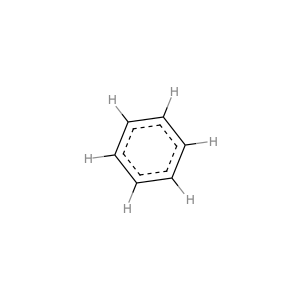

In [48]:
# Defining the SMILES string from df
benz_smiles = df.name_smiles[1]
# Building the benzene molecule and ADDING HYDROGENS
benz = Chem.AddHs(Chem.MolFromSmiles(benz_smiles))
# 'Embedding' the molecule to assign coordinates to nuclei
AllChem.EmbedMolecule(benz)
# Optimising the molecule
AllChem.MMFFOptimizeMolecule(benz)
# Generating universal force field model
ff1 = AllChem.UFFGetMoleculeForceField(benz)
# Getting the positions of nuclei; returned as a tuple of the form (x1, y1, z1, x2, y2, z2, x3, ...)
pos1 = ff1.Positions()
# Drawing the molecule
draw.MolToImage(benz, kekulize=False) # can also use .MolToFile to save to a file

In [55]:
benz_type = benz_H.GetAtoms()

In [45]:
benz_H.GetNumAtoms()

12

In [6]:
benz_type = []
for atom in benz_H.GetAtoms():
    benz_type.append(atom.GetAtomicNum())
#     print(atom.GetAtomicNum())
benz_type

[6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1]

In [8]:
def grouper(n, iterable, fillvalue=None):
    "grouper(3, 'ABCDEFG', 'x') --> ABC DEF Gxx"
    args = [iter(iterable)] * n
    return zip_longest(fillvalue=fillvalue, *args)

In [10]:
import matplotlib.pyplot as plt
x = []
y = []
z = []

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
for item1, item2, item3 in grouper(3, pos2):
    x.append(item1)
    y.append(item2)
    z.append(item3)
#     ax.scatter(item1, item2, item3)

In [42]:
benz_df = pd.DataFrame()
benz_df['charge'] = benz_type
benz_df['x'] = x
benz_df['y'] = y
benz_df['z'] = z
# benz_df.index += 1

benz_df

,charge,x,y,z
0,6,1.236585,-0.644340,-0.034985
1,6,1.175785,0.749136,-0.043156
2,6,-0.060799,1.393476,-0.008169
3,6,-1.236585,0.644340,0.034989
4,6,-1.175786,-0.749136,0.043161
5,6,0.060799,-1.393475,0.008174
6,1,2.200026,-1.146356,-0.062252
7,1,2.091857,1.332800,-0.076778
8,1,-0.108166,2.479155,-0.014542
9,1,-2.200027,1.146355,0.062246


In [43]:
def get_coulomb_matrix(molecule_df)
    num_atoms = len(molecule_df)
    coulomb = np.zeros(shape=(num_atoms,num_atoms))
    for indexi, rowi in benz_df.iterrows():
        for indexj, rowj in benz_df.iterrows():
            Zi = rowi.charge
            xi = rowi.x
            yi = rowi.y
            zi = rowi.z
            Zj = rowj.charge
            xj = rowj.x
            yj = rowj.y
            zj = rowj.z
            if indexi == indexj:
                element = 0.5 * math.pow(Zi, 2.4)
            else:
                norm_diff = math.sqrt(math.pow((xi-xj),2) + math.pow((yi-yj),2) + math.pow((zi-zj),2))
                element = Zi * Zj / norm_diff
            coulomb[indexi][indexj] = element
            
    return coulomb

In [44]:
coulomb

array([[36.8581052 , 25.80967822, 14.90121972, 12.90483041, 14.90121332,
        25.80967466,  5.52114997,  2.78473417,  1.76432497,  1.54783472,
         1.76432414,  2.78473572],
       [25.80967822, 36.8581052 , 25.80966833, 14.90121712, 12.90483514,
        14.90122914,  2.78473286,  5.52115123,  2.78473545,  1.76432424,
         1.54783497,  1.76432557],
       [14.90121972, 25.80966833, 36.8581052 , 25.80966791, 14.90122266,
        12.90484186,  1.76432408,  2.78473417,  5.52115067,  2.78473336,
         1.76432421,  1.54783569],
       [12.90483041, 14.90121712, 25.80966791, 36.8581052 , 25.809675  ,
        14.90122311,  1.54783458,  1.76432443,  2.78473194,  5.52115166,
         2.78473256,  1.76432463],
       [14.90121332, 12.90483514, 14.90122266, 25.809675  , 36.8581052 ,
        25.80966548,  1.764324  ,  1.54783509,  1.76432423,  2.7847342 ,
         5.52114973,  2.78473316],
       [25.80967466, 14.90122914, 12.90484186, 14.90122311, 25.80966548,
        36.8581052 ,  

In [ ]:
def coulomb_matrix_element(rowi, rowj):
    if Zi == Zj and Ri == Rj:
        element = 0.5 * math.pow(Zi, 2.4)
    else:
        element = Zi * Zj / 
        
    return element